In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.utils.extmath import softmax
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from src.supervised_NDL import SMF_BCD
from util.plotting import display_dict_and_graph
from util.plotting import *
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [7]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# X = X.values  ### Uncomment this line if you are having type errors in plotting. It is loading as a pandas dataframe, but our indexing is for numpy array. 
X = X / 255.

print('X.shape', X.shape)
print('y.shape', y.shape)

'''
Each row of X is a vectroization of an image of 28 x 28 = 784 pixels.  
The corresponding row of y holds the true class label from {0,1, .. , 9}.
'''

X.shape (70000, 784)
y.shape (70000,)


'\nEach row of X is a vectroization of an image of 28 x 28 = 784 pixels.  \nThe corresponding row of y holds the true class label from {0,1, .. , 9}.\n'

In [8]:
### Change the dimension of y for SMF_BCD
y_matrix = np.zeros((9, y.shape[0]))
for i in range(y.shape[0]):
    label = int(y[i])
    if label == 0:
        continue
    else:
        y_matrix[label-1, i] = 1

print(y_matrix.shape)
    

(9, 70000)


In [9]:
### Scale the input data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)

X= scaler.transform(X)

print(X.shape)

(70000, 784)


In [10]:
SMF_Train = SMF_BCD.SDL_BCD([X.T, y_matrix], X_test=[X.T, y_matrix], xi= 5, n_components=16)

results_dict = SMF_Train.fit(iter=100, subsample_size=None,# search_radius_const=200*np.linalg.norm(X),
                                if_compute_recons_error=False, if_validate=True, threshhold=0.5)

initial loading beta [[-0.86040562 -0.18365237 -0.12319656  0.68939391  0.89753361 -0.59707511
  -0.63869901  0.60144912 -0.53803785 -0.52554197  0.69797455 -0.73115176
   0.67341763  0.8395426  -0.11517152 -0.56554456  0.53096367]
 [ 0.05702922  0.81898733  0.08559024  0.915428   -0.05959841  0.15176885
   0.94899459 -0.28737765  0.54063839  0.62352615 -0.71012857  0.2528927
  -0.68590855 -0.25373595  0.11707637  0.11056814 -0.16873613]
 [ 0.73328879 -0.05645423  0.20332947  0.96808017  0.42928147  0.95207417
   0.26065953  0.73975213  0.84751656  0.90439902  0.83992787  0.28536881
   0.89378404  0.99184608 -0.25702787  0.29568109 -0.49961691]
 [-0.31826673 -0.79494406 -0.82707893  0.3927518  -0.08796922  0.60607226
   0.59793548 -0.07531039  0.13032015 -0.47281834  0.49130762 -0.80310962
  -0.03487017 -0.71920658  0.05174139 -0.24270145  0.35284889]
 [-0.41016255 -0.8417688  -0.65243567 -0.03402188 -0.36806967  0.91426804
   0.56451348 -0.96603444 -0.3326576   0.90621673 -0.42711636 

  0%|          | 0/100 [00:00<?, ?it/s]

 !!! Running LogisticRegression in sklearn


  1%|          | 1/100 [00:06<10:11,  6.18s/it]

 !!! Running LogisticRegression in sklearn


  2%|▏         | 2/100 [00:13<11:08,  6.82s/it]

 !!! Running LogisticRegression in sklearn


  3%|▎         | 3/100 [00:18<09:54,  6.13s/it]

 !!! Running LogisticRegression in sklearn


  4%|▍         | 4/100 [00:24<09:36,  6.00s/it]

 !!! Running LogisticRegression in sklearn


  5%|▌         | 5/100 [00:30<09:38,  6.09s/it]

 !!! Running LogisticRegression in sklearn


  6%|▌         | 6/100 [00:36<09:27,  6.03s/it]

 !!! Running LogisticRegression in sklearn


  7%|▋         | 7/100 [00:43<09:38,  6.23s/it]

 !!! Running LogisticRegression in sklearn


  8%|▊         | 8/100 [00:50<10:05,  6.58s/it]

 !!! Running LogisticRegression in sklearn


  9%|▉         | 9/100 [00:56<09:32,  6.29s/it]

 !!! Running LogisticRegression in sklearn


 10%|█         | 10/100 [01:01<08:57,  5.98s/it]

 !!! Running LogisticRegression in sklearn
!!! pred_type filter


 11%|█         | 11/100 [01:06<08:34,  5.78s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[559749,   7154],
       [ 20983,  42114]]), np.float64(0.955)]
 !!! Running LogisticRegression in sklearn


 12%|█▏        | 12/100 [01:11<07:55,  5.40s/it]

 !!! Running LogisticRegression in sklearn


 13%|█▎        | 13/100 [01:16<07:26,  5.14s/it]

 !!! Running LogisticRegression in sklearn


 14%|█▍        | 14/100 [01:20<07:03,  4.93s/it]

 !!! Running LogisticRegression in sklearn


 15%|█▌        | 15/100 [01:25<06:55,  4.88s/it]

 !!! Running LogisticRegression in sklearn


 16%|█▌        | 16/100 [01:29<06:41,  4.78s/it]

 !!! Running LogisticRegression in sklearn


 17%|█▋        | 17/100 [01:34<06:28,  4.68s/it]

 !!! Running LogisticRegression in sklearn


 18%|█▊        | 18/100 [01:39<06:29,  4.75s/it]

 !!! Running LogisticRegression in sklearn


 19%|█▉        | 19/100 [01:44<06:40,  4.94s/it]

 !!! Running LogisticRegression in sklearn


 20%|██        | 20/100 [01:49<06:29,  4.87s/it]

 !!! Running LogisticRegression in sklearn
!!! pred_type filter


 21%|██        | 21/100 [01:54<06:35,  5.01s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[559944,   6959],
       [ 17373,  45724]]), np.float64(0.961)]
 !!! Running LogisticRegression in sklearn


 22%|██▏       | 22/100 [01:59<06:28,  4.98s/it]

 !!! Running LogisticRegression in sklearn


 23%|██▎       | 23/100 [02:04<06:16,  4.89s/it]

 !!! Running LogisticRegression in sklearn


 24%|██▍       | 24/100 [02:09<06:12,  4.90s/it]

 !!! Running LogisticRegression in sklearn


 25%|██▌       | 25/100 [02:14<06:20,  5.07s/it]

 !!! Running LogisticRegression in sklearn


 26%|██▌       | 26/100 [02:20<06:40,  5.41s/it]

 !!! Running LogisticRegression in sklearn


 27%|██▋       | 27/100 [02:26<06:37,  5.45s/it]

 !!! Running LogisticRegression in sklearn


 28%|██▊       | 28/100 [02:31<06:33,  5.47s/it]

 !!! Running LogisticRegression in sklearn


 29%|██▉       | 29/100 [02:39<07:23,  6.25s/it]

 !!! Running LogisticRegression in sklearn


 30%|███       | 30/100 [02:46<07:17,  6.25s/it]

 !!! Running LogisticRegression in sklearn
!!! pred_type filter


 31%|███       | 31/100 [02:52<07:11,  6.25s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[560057,   6846],
       [ 15891,  47206]]), np.float64(0.964)]
 !!! Running LogisticRegression in sklearn


 32%|███▏      | 32/100 [02:58<07:03,  6.23s/it]

 !!! Running LogisticRegression in sklearn


 33%|███▎      | 33/100 [03:05<07:08,  6.40s/it]

 !!! Running LogisticRegression in sklearn


 34%|███▍      | 34/100 [03:11<07:01,  6.39s/it]

 !!! Running LogisticRegression in sklearn


 35%|███▌      | 35/100 [03:18<06:55,  6.39s/it]

 !!! Running LogisticRegression in sklearn


 36%|███▌      | 36/100 [03:23<06:20,  5.95s/it]

 !!! Running LogisticRegression in sklearn


 37%|███▋      | 37/100 [03:28<05:56,  5.66s/it]

 !!! Running LogisticRegression in sklearn


 38%|███▊      | 38/100 [03:33<05:42,  5.52s/it]

 !!! Running LogisticRegression in sklearn


 39%|███▉      | 39/100 [03:38<05:24,  5.32s/it]

 !!! Running LogisticRegression in sklearn


 40%|████      | 40/100 [03:43<05:15,  5.26s/it]

 !!! Running LogisticRegression in sklearn
!!! pred_type filter


 41%|████      | 41/100 [03:48<05:11,  5.28s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[560170,   6733],
       [ 15273,  47824]]), np.float64(0.965)]
 !!! Running LogisticRegression in sklearn


 42%|████▏     | 42/100 [03:53<04:56,  5.12s/it]

 !!! Running LogisticRegression in sklearn


 43%|████▎     | 43/100 [03:58<04:48,  5.06s/it]

 !!! Running LogisticRegression in sklearn


 44%|████▍     | 44/100 [04:02<04:36,  4.93s/it]

 !!! Running LogisticRegression in sklearn


 45%|████▌     | 45/100 [04:07<04:30,  4.92s/it]

 !!! Running LogisticRegression in sklearn


 46%|████▌     | 46/100 [04:14<04:48,  5.34s/it]

 !!! Running LogisticRegression in sklearn


 47%|████▋     | 47/100 [04:18<04:36,  5.21s/it]

 !!! Running LogisticRegression in sklearn


 48%|████▊     | 48/100 [04:24<04:36,  5.33s/it]

 !!! Running LogisticRegression in sklearn


 49%|████▉     | 49/100 [04:29<04:27,  5.25s/it]

 !!! Running LogisticRegression in sklearn


 50%|█████     | 50/100 [04:35<04:25,  5.31s/it]

 !!! Running LogisticRegression in sklearn
!!! pred_type filter


 51%|█████     | 51/100 [04:40<04:27,  5.46s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[560238,   6665],
       [ 14895,  48202]]), np.float64(0.966)]
 !!! Running LogisticRegression in sklearn


 52%|█████▏    | 52/100 [04:45<04:09,  5.19s/it]

 !!! Running LogisticRegression in sklearn


 53%|█████▎    | 53/100 [04:50<03:56,  5.04s/it]

 !!! Running LogisticRegression in sklearn


 54%|█████▍    | 54/100 [04:55<03:57,  5.17s/it]

 !!! Running LogisticRegression in sklearn


 55%|█████▌    | 55/100 [05:02<04:21,  5.81s/it]

 !!! Running LogisticRegression in sklearn


 56%|█████▌    | 56/100 [05:09<04:29,  6.13s/it]

 !!! Running LogisticRegression in sklearn


 57%|█████▋    | 57/100 [05:16<04:26,  6.20s/it]

 !!! Running LogisticRegression in sklearn


 58%|█████▊    | 58/100 [05:21<04:10,  5.96s/it]

 !!! Running LogisticRegression in sklearn


 59%|█████▉    | 59/100 [05:27<04:00,  5.86s/it]

 !!! Running LogisticRegression in sklearn


 60%|██████    | 60/100 [05:31<03:41,  5.54s/it]

 !!! Running LogisticRegression in sklearn
!!! pred_type filter


 61%|██████    | 61/100 [05:37<03:33,  5.48s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[560258,   6645],
       [ 14697,  48400]]), np.float64(0.966)]
 !!! Running LogisticRegression in sklearn


 62%|██████▏   | 62/100 [05:41<03:18,  5.24s/it]

 !!! Running LogisticRegression in sklearn


 63%|██████▎   | 63/100 [05:46<03:10,  5.14s/it]

 !!! Running LogisticRegression in sklearn


 64%|██████▍   | 64/100 [05:52<03:08,  5.22s/it]

 !!! Running LogisticRegression in sklearn


 65%|██████▌   | 65/100 [05:57<03:07,  5.36s/it]

 !!! Running LogisticRegression in sklearn


 66%|██████▌   | 66/100 [06:02<02:57,  5.23s/it]

 !!! Running LogisticRegression in sklearn


 67%|██████▋   | 67/100 [06:07<02:49,  5.13s/it]

 !!! Running LogisticRegression in sklearn


 68%|██████▊   | 68/100 [06:12<02:40,  5.01s/it]

 !!! Running LogisticRegression in sklearn


 69%|██████▉   | 69/100 [06:17<02:39,  5.15s/it]

 !!! Running LogisticRegression in sklearn


 70%|███████   | 70/100 [06:23<02:40,  5.34s/it]

 !!! Running LogisticRegression in sklearn
!!! pred_type filter


 71%|███████   | 71/100 [06:30<02:46,  5.76s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[560225,   6678],
       [ 14574,  48523]]), np.float64(0.966)]
 !!! Running LogisticRegression in sklearn


 72%|███████▏  | 72/100 [06:36<02:42,  5.81s/it]

 !!! Running LogisticRegression in sklearn


 73%|███████▎  | 73/100 [06:42<02:35,  5.78s/it]

 !!! Running LogisticRegression in sklearn


 74%|███████▍  | 74/100 [06:47<02:23,  5.52s/it]

 !!! Running LogisticRegression in sklearn


 75%|███████▌  | 75/100 [06:52<02:13,  5.36s/it]

 !!! Running LogisticRegression in sklearn


 76%|███████▌  | 76/100 [06:57<02:06,  5.27s/it]

 !!! Running LogisticRegression in sklearn


 77%|███████▋  | 77/100 [07:02<02:00,  5.25s/it]

 !!! Running LogisticRegression in sklearn


 78%|███████▊  | 78/100 [07:08<02:01,  5.51s/it]

 !!! Running LogisticRegression in sklearn


 79%|███████▉  | 79/100 [07:13<01:51,  5.30s/it]

 !!! Running LogisticRegression in sklearn


 80%|████████  | 80/100 [07:18<01:46,  5.33s/it]

 !!! Running LogisticRegression in sklearn
!!! pred_type filter


 81%|████████  | 81/100 [07:24<01:43,  5.45s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[560224,   6679],
       [ 14527,  48570]]), np.float64(0.966)]
 !!! Running LogisticRegression in sklearn


 82%|████████▏ | 82/100 [07:30<01:39,  5.51s/it]

 !!! Running LogisticRegression in sklearn


 83%|████████▎ | 83/100 [07:35<01:32,  5.41s/it]

 !!! Running LogisticRegression in sklearn


 84%|████████▍ | 84/100 [07:40<01:24,  5.31s/it]

 !!! Running LogisticRegression in sklearn


 85%|████████▌ | 85/100 [07:44<01:16,  5.10s/it]

 !!! Running LogisticRegression in sklearn


 86%|████████▌ | 86/100 [07:49<01:09,  4.98s/it]

 !!! Running LogisticRegression in sklearn


 87%|████████▋ | 87/100 [07:55<01:06,  5.15s/it]

 !!! Running LogisticRegression in sklearn


 88%|████████▊ | 88/100 [08:00<01:01,  5.14s/it]

 !!! Running LogisticRegression in sklearn


 89%|████████▉ | 89/100 [08:05<00:56,  5.14s/it]

 !!! Running LogisticRegression in sklearn


 90%|█████████ | 90/100 [08:10<00:51,  5.16s/it]

 !!! Running LogisticRegression in sklearn
!!! pred_type filter


 91%|█████████ | 91/100 [08:16<00:49,  5.50s/it]

!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[560256,   6647],
       [ 14545,  48552]]), np.float64(0.966)]
 !!! Running LogisticRegression in sklearn


 92%|█████████▏| 92/100 [08:22<00:45,  5.63s/it]

 !!! Running LogisticRegression in sklearn


 93%|█████████▎| 93/100 [08:28<00:39,  5.63s/it]

 !!! Running LogisticRegression in sklearn


 94%|█████████▍| 94/100 [08:33<00:32,  5.38s/it]

 !!! Running LogisticRegression in sklearn


 95%|█████████▌| 95/100 [08:37<00:25,  5.14s/it]

 !!! Running LogisticRegression in sklearn


 96%|█████████▌| 96/100 [08:42<00:20,  5.08s/it]

 !!! Running LogisticRegression in sklearn


 97%|█████████▋| 97/100 [08:47<00:14,  4.89s/it]

 !!! Running LogisticRegression in sklearn


 98%|█████████▊| 98/100 [08:51<00:09,  4.78s/it]

 !!! Running LogisticRegression in sklearn


 99%|█████████▉| 99/100 [08:56<00:04,  4.77s/it]

 !!! Running LogisticRegression in sklearn


100%|██████████| 100/100 [09:01<00:00,  5.41s/it]
/Users/yee/miniforge3/envs/REU2024/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


!!! pred_type filter
!!! FINAL [confusion_mx, Accuracy] =  [array([[560255,   6648],
       [ 14505,  48592]]), np.float64(0.966)]


In [11]:
W = results_dict.get('loading')[0]
beta= results_dict.get('loading')[1]
H = results_dict.get('code')

In [12]:
n = np.random.randint(0, 70000, size=100)
X_test = np.ones((X.shape[1], 100))
y_test = np.ones(shape=100)
for i in range(100):
    X_test[:, i] = X.T[:, n[i]]
    y_test[i] = y[n[i]]

p = np.zeros((100, 9))
for i in range(100):
    normalizer = 1 + np.sum(np.exp(beta[:, 1:] @ W.T @ X_test[:, i] + beta[:, 0]))
    p[i] = (np.exp(beta[:, 1:] @ W.T @ X_test[:, i] + beta[:, 0]) / normalizer).T


acc = 0
for j in range(100):
    prob = np.max(p[j])
    number = np.argmax(p[j]) + 1
    if (1 - np.sum(p[j])) > prob:
        number = 0
    if y_test[j] == number:
        acc += 1

print(f"The accuracy rate: {acc/100}")


The accuracy rate: 0.86


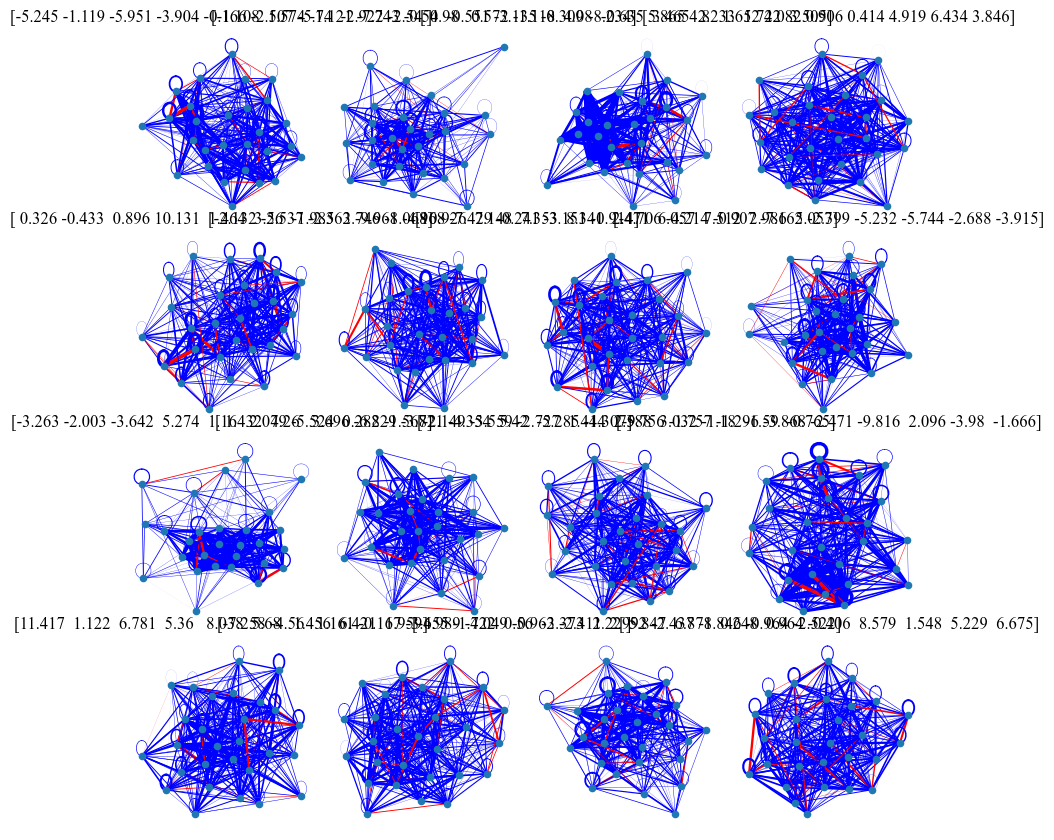

In [14]:
display_dict_and_graph(save_path=f'output/figure/MINIST', W=W, regression_coeff=beta.T, fig_size=[10,10], plot_graph_only=True)

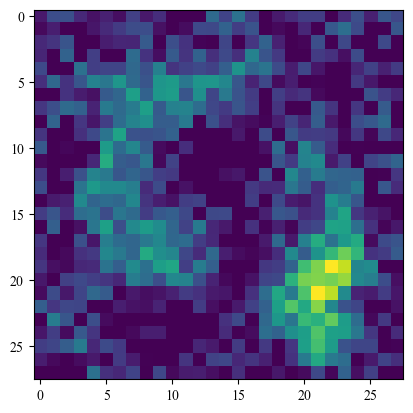

In [19]:
a = W[:, 0].reshape(28,28)
plt.imshow(a)

In [21]:
print(beta.T[0])

[-6.76933721  0.63518395  0.54175586 -1.05085688  1.46701259 -1.51404504
 -1.23845321  2.12582502 -1.16807209]
